# Exploratory Data Analysis
This notebook analysed the airline passengerby grouping the data by customer loyalty and overall satisfaction. 
- Calculates the percentage of loyal and disloyal customers. 
- Calculates the percentage of the satisfied and dissatisfied/neutral customers by loyal and disloyal customer groups
- loyal and satisfied customer group: 
        - Calculates the percentage of each rank (e.g., 0, 1, 2, 3, 4, 5) for this subgroup.
        - Calculates the percentage of each rank for the entire loyal customer group.
- loyal and dissatisfied/neuratl customer group: 
        - Calculates the percentage of each rank for this subgroup.
        - Calculates the percentage of each rank for the entire loyal customer group.
- Calculates the effects of the vairables on the loyal customer groups  customers by measuring the Shannon-Jensen distance.
        

##  Notebook Organization

Part 1: Load Packages

Part 2: User Defined Functions

Part 3: Read Data 

Part 4: Explore Data  

4.1: Quick Check  : Dataframe Property

4.2: Detailed Check : 

4.2a: Investigate the interaction of all features with Loyality and satisfaction

4.2b: Distribution Similarity using Jensen-Shannon Distance Measure, Relative Entropy (0 : No Difference)

Part 5: Feature Importance Plot (Shannon-Jensen) 

Part 6: Explore Class Decision Boundary 

## Part 1: Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy.spatial.distance import jensenshannon

## Part 2: User Defined Functions

In [2]:
def getFeatureInteraction(df, controlFeature, targetFeature): 
    """
    Input : Dataframe, Control Feature (List of two strings), Target Feature Name (List of one string)
    Output: Dataframe having interaction between Control Feature & Target Feature
    """
    df1 = df.groupby(controlFeature + targetFeature).size().to_frame().reset_index().rename( columns= {0:"Count"} )
    df2 = df.groupby(controlFeature).size().to_frame().reset_index().rename( columns= {0:"Count"} )

    grouped = pd.merge(df1, df2, left_on=controlFeature, right_on=controlFeature)
    grouped['Fraction'] = grouped.apply( lambda x : round(100 * float(x[3])/x[4], 4), axis=1)
    return grouped

In [3]:
# Figure (save) path
# C:\Users\AR\TDI Project\Models\Figures
#def plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels, fName, file_to_save = None):


In [4]:
def plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels, fName):
    fig, ax = plt.subplots(figsize=(8,5))

    width = 0.35  # the width of the bars
    x = x         # the xlabel locations
    y = y         # the ylabel locations

    bars1 = ax.bar(x - width/2, h[0], width, color='red', label=legend_labels[0])
    bars2 = ax.bar(x + width/2, h[1], width, color='lightblue', label=legend_labels[1])

    # Setting x-axis
    ax.set_xticks(x)
    ax.set_xticklabels(labels=xtick_label, fontsize=12)
    ax.set_xlabel(fName, fontsize=15)

    # Setting y-axis
    ax.set_yticks(y)
    ax.set_yticklabels(labels=ytick_label, fontsize=12)
    ax.set_ylabel("Percent of Customers", fontsize=15)

    # Setting legend
#    ax.legend(fontsize=12, loc=2)
    ax.legend(fontsize=12, loc = 'best')


    # Setting bar text
    for k in x:
        height = bars1[k].get_height()
        plt.text(x[k]-0.3, height+0.5, str(round(y1[k],2))+" %", fontsize=11)
        height = bars2[k].get_height()
        plt.text(x[k]+0.05, height+0.5, str(round(y2[k],2))+" %", fontsize=11) 

    plt.show()
#     Save file
#     fsave = 'C:\\Users\\AR\\TDI Project\\Models\\Figures\\' + fName + '.png'
#     fig.savefig(fsave, dpi=fig.dpi)

In [5]:
def getJensenShannon(df, controlFeature, targetFeature): 
    """
    Input  : Dataframe, Control Feature (List of two strings), Target Feature Name (List of one string)
    Output : Thee-way Interaction
    Output : Jensen-Shannon Distance Measure (Average KL Divergence)
    """
    
    df1 = df.groupby(controlFeature + targetFeature).size().to_frame().reset_index().rename( columns= {0:"Count"} )
    df2 = df.groupby(controlFeature).size().to_frame().reset_index().rename( columns= {0:"Count"} )

    groupped = pd.merge(df1, df2, left_on=controlFeature, right_on=controlFeature)
    groupped['Fraction'] = groupped.apply( lambda x : round(float(x[3])/x[4], 6), axis=1)
    
    cList = [targetFeature[0],'Fraction']
    grp_p = groupped.loc[(groupped[controlFeature[0]]=='Loyal Customer') &
                     (groupped[controlFeature[1]]!='satisfied'), cList]
    grp_q = groupped.loc[(groupped[controlFeature[0]]=='Loyal Customer') &
                     (groupped[controlFeature[1]]=='satisfied'), cList]
    
    ind_p = grp_p.iloc[:,0].to_numpy()
    ind_q = grp_q.iloc[:,0].to_numpy()
    
    prb_p = grp_p.iloc[:,1].to_numpy()
    prb_q = grp_q.iloc[:,1].to_numpy()
    
    del_len = ind_p.shape[0] - ind_q.shape[0]

    if del_len > 0:
        p = prb_p
        q = np.zeros( p.shape[0] )
        logical = np.isin(ind_p, ind_q)
        k=0
        for i in range(q.shape[0]):
            if logical[i]:
                q[i] = prb_q[k]
                k += 1
        js_distance = jensenshannon(p, q, base=2)
    elif del_len < 0:
        q = prb_q
        p = np.zeros( q.shape[0] )
        logical = np.isin(ind_q, ind_p)
        k=0
        for i in range(p.shape[0]):
            if logical[i]:
                p[i] = prb_p[k]
                k += 1
        js_distance = jensenshannon(p, q, base=2)
    else:
        p = prb_p
        q = prb_q
        js_distance = jensenshannon(p, q, base=2)
   
    return js_distance

## Part 3: Read Data

In [6]:
df = pd.read_excel(r"C:\Users\AR\data_customerSatisfaction.xlsx")
print("Shape of the Dataframe :", df.shape)

Shape of the Dataframe : (129880, 24)


In [7]:
# print( df.columns.to_list() )

## Part 4: Explore Data

### 4.1 Dataframe by CustomerType

#### 4.1.1a Customer loyality 

In [8]:
df_ct = df.groupby(["CustomerType"]).size().to_frame().reset_index().rename( columns= {0:"Count"} )
df_ct['Total Customer'] = df.shape[0]
df_ct['Fraction'] = df_ct.apply( lambda x : round(100* float(x[1])/x[2], 2), axis=1)
num_loyal = 106100 #df_ct['Count'][0]
num_disloyal = df_ct['Count'][1]

#print(df_ct)


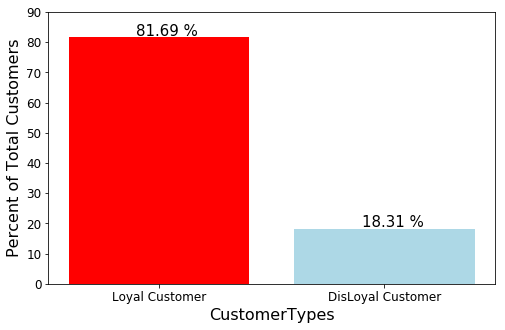

In [9]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(2)
y = np.arange(0,100,10)

xlabel = ["Loyal Customer", "DisLoyal Customer"]

bars = ax.bar(x, df_ct["Fraction"], color=["red", "lightblue"])

# Setting x-axis
ax.set_xticks(x)
ax.set_xticklabels(labels=xlabel, fontsize=12)
ax.set_xlabel("CustomerTypes", fontsize=16)

# Setting y-axis
ax.set_yticks(y)
ax.set_yticklabels(labels=y, fontsize=12)
ax.set_ylabel("Percent of Total Customers", fontsize=16)

# Setting bar text 
for k in x:
    height = bars[k].get_height()
    plt.text(x[k]-0.1, height+0.5, str(df_ct['Fraction'].tolist()[k])+" %", fontsize=15)

plt.show()

In [10]:
# CustomerType 
#fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\CustomerType_Loyal_&_Disloyal.png', dpi=fig.dpi)

#### 4.1.1b Customer Loyalty & Statisfaction

In [11]:
df_satis = df.groupby(["SatisfactionType"]).size().to_frame().reset_index().rename( columns= {0:"Count"} )
df_satis['Total Customer'] = df.shape[0]
df_satis['Fraction'] = df_satis.apply( lambda x : round(100* float(x[1])/x[2], 2), axis=1)
print(df_satis)

          SatisfactionType  Count  Total Customer  Fraction
0  neutral or dissatisfied  73452          129880     56.55
1                satisfied  56428          129880     43.45


#### Check : Fraction of Disloyal and Loyal Customers

The company has ~56% of the customers are satisfied customers. 

Comment: Customer Loyalty & Satisfaction

The company has ~82% loyal customers and 56% satisfied customers. It is of interest to find the relationship between the customer loyalty and satisfaction.

In [12]:
df_custtype = df.groupby(["CustomerType", "SatisfactionType"]).size().to_frame().reset_index().rename( columns= {0:"Count"} )
df_custtype['Total Customer'] = df.shape[0]
df_custtype['Fraction'] = df_custtype.apply( lambda x : round(100* float(x[2])/x[3], 2), axis=1)
print(df_custtype)

        CustomerType         SatisfactionType  Count  Total Customer  Fraction
0     Loyal Customer  neutral or dissatisfied  55372          129880     42.63
1     Loyal Customer                satisfied  50728          129880     39.06
2  disloyal Customer  neutral or dissatisfied  18080          129880     13.92
3  disloyal Customer                satisfied   5700          129880      4.39


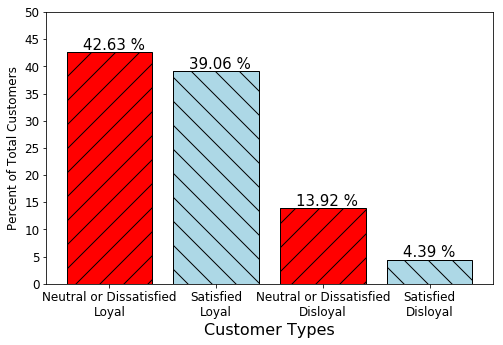

In [13]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(4)
y = np.arange(0,51,5)
patterns = [ "/" , "\\" ,  "/" , "\\" ]
colors=['red', 'lightblue', 'red','lightblue']
bars = ax.bar(x, df_custtype['Fraction'][0:len(x)])

xlabel = ["Neutral or Dissatisfied\nLoyal", "Satisfied\nLoyal", 
          "Neutral or Dissatisfied\nDisloyal", "Satisfied\nDisloyal"]
for i in range(len(patterns)):
    ax.bar(x[i], df_custtype['Fraction'][i], color=colors[i], edgecolor='black', hatch=patterns[i])


# Setting x-axis
ax.set_xticks(x)
ax.set_xticklabels(labels=xlabel, fontsize=12)
ax.set_xlabel("Customer Types", fontsize=16)

# Setting y-axis
ax.set_yticks(y)
ax.set_yticklabels(labels=y, fontsize=12)
ax.set_ylabel("Percent of Total Customers", fontsize=12)

# Setting bar text 
for k in x:
    height = bars[k].get_height()
    plt.text(x[k]-0.25, height+0.5, str(df_custtype['Fraction'].tolist()[k])+" %", fontsize=15)

plt.show()

In [14]:
#fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\Loyalty_&_Satisfaction.png', dpi=fig.dpi)

### 4.2 : Feature Importance (similarity check)
Data is grouped by customer loyalty and satisfaction. Feature importance is low if Shannon-Jensen distance is a small value.

In [15]:
cat_feature = []
cat_value = []

In [16]:
#Legend labels
label_LD='Loyal Customer - Neutral or Dissatisfied'
label_LS='Loyal Customer - Satisfied'
legend_labels_L = [label_LD, label_LS]
label_DD='disloyal Customer - Neutral or Dissatisfied'
label_DS='disloyal Customer - Satisfied'
legend_labels_D = [label_DD, label_DS]

#### 4.2.1 Gender

##### 4.2.1a Loyal Customers

In [17]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ['Gender']
df_gender = getFeatureInteraction(df, controlFeature, targetFeature)

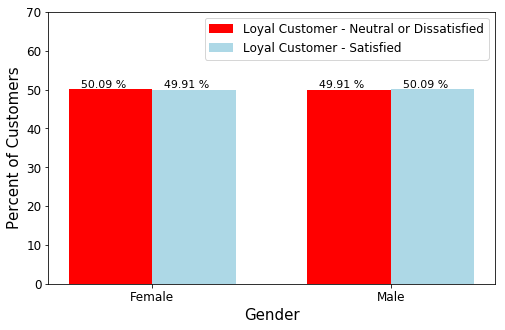

In [18]:
x = np.arange(2)        # the xlabel locations
y = np.arange(0,76,10)  # the ylabel locations
y1 = df_gender[ (df_gender["CustomerType"]=="Loyal Customer") & (df_gender["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_gender[ (df_gender["CustomerType"]=="Loyal Customer") & (df_gender["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Female","Male"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L,targetFeature[0].title() )

In [19]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")


Distribution Similarity : CustomerType & Satisfaction Type vs Gender : 0.0015


In [20]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\Gender.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

##### 4.2.1b Disloyal Customers

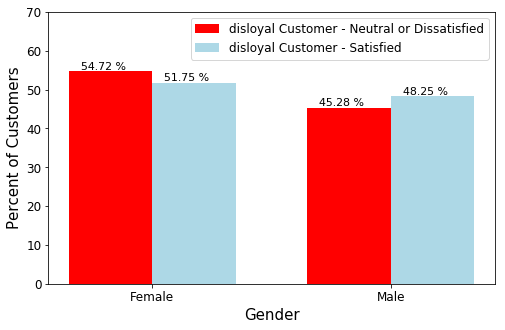

In [21]:
x = np.arange(2)        # the xlabel locations
y = np.arange(0,76,10)  # the ylabel locations
y1 = df_gender[ (df_gender["CustomerType"]=="disloyal Customer") & (df_gender["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_gender[ (df_gender["CustomerType"]=="disloyal Customer") & (df_gender["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Female","Male"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_D,targetFeature[0].title() )

#### 4.2.2a Type of Travel
Business travel vs. Personal travel

In [22]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Type of Travel"]
df_travel_type = getFeatureInteraction(df, controlFeature, targetFeature)

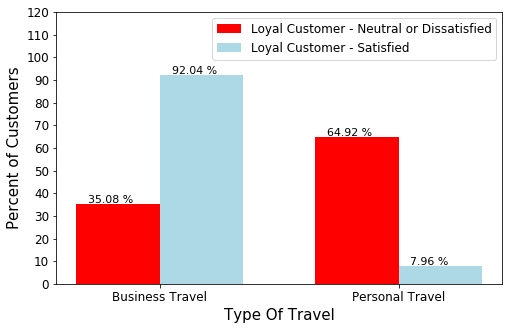

In [23]:
x = np.arange(2)        # the xlabel locations
y = np.arange(0,126,10) # the ylabel locations
y1 = df_travel_type[ (df_travel_type["CustomerType"]=="Loyal Customer") & (df_travel_type["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_travel_type[ (df_travel_type["CustomerType"]=="Loyal Customer") & (df_travel_type["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Business Travel","Personal Travel"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title())

In [24]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Type of Travel : 0.5277


In [25]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\Business&Personal_Travel.png.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.2b Percentage distribution: Loyal Customers, business travel vs. personal travel

In [26]:
def getFeatureInteraction2(df, controlFeature, targetFeature): 
    """
    Input : Dataframe, Control Feature (List of two strings), Target Feature Name (List of one string)
    Output: Dataframe having interaction between Control Feature & Target Feature
    """
    df1 = df.groupby(controlFeature + targetFeature).size().to_frame().reset_index().rename( columns= {0:"Count"} )
    df2 = df.groupby(controlFeature).size().to_frame().reset_index().rename( columns= {0:"Count"} )

    grouped = pd.merge(df1, df2, left_on=controlFeature, right_on=controlFeature)
    group = grouped.groupby('CustomerType').agg(sum)
    group = group['Count_x']
    grouped['Fraction'] = grouped.apply( lambda x : round(100 * float(x[3])/group[0], 4), axis=1)

    return grouped

In [27]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Type of Travel"]
df_travel_type = getFeatureInteraction2(df, controlFeature, targetFeature)

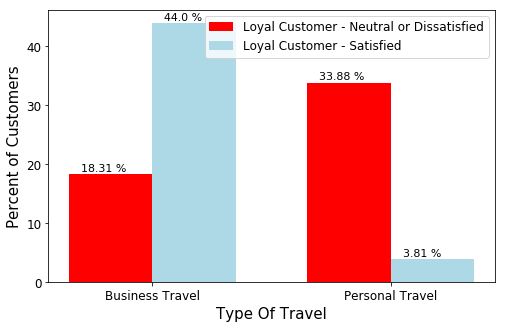

In [28]:
x = np.arange(2)        # the xlabel locations
y = np.arange(0,50,10) # the ylabel locations
y1 = df_travel_type[ (df_travel_type["CustomerType"]=="Loyal Customer") & (df_travel_type["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_travel_type[ (df_travel_type["CustomerType"]=="Loyal Customer") & (df_travel_type["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Business Travel","Personal Travel"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

Comment: Loyal - Business travelers are more satisfied and Loyal- Personal travelers are very dissatisfied/neutral.

#### Disloyal customer

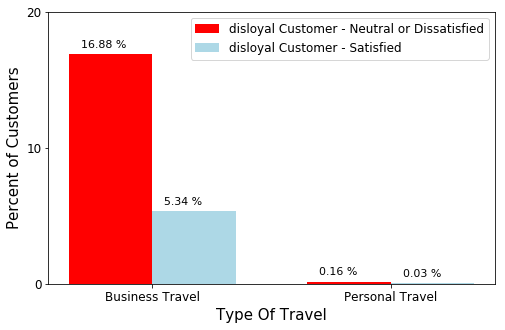

In [29]:
x = np.arange(2)        # the xlabel locations
y = np.arange(0,30,10) # the ylabel locations
y1 = df_travel_type[ (df_travel_type["CustomerType"]=="disloyal Customer") & (df_travel_type["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_travel_type[ (df_travel_type["CustomerType"]=="disloyal Customer") & (df_travel_type["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Business Travel","Personal Travel"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_D, targetFeature[0].title() )

Comment: Disloyal - Business travelers are very dissatisfied, an opposite behavior compared to loyal-business travelers.

#### 4.2.3a Class
Business class
Economy Class
Economy Class

In [30]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Class"]
df_class = getFeatureInteraction(df, controlFeature, targetFeature)

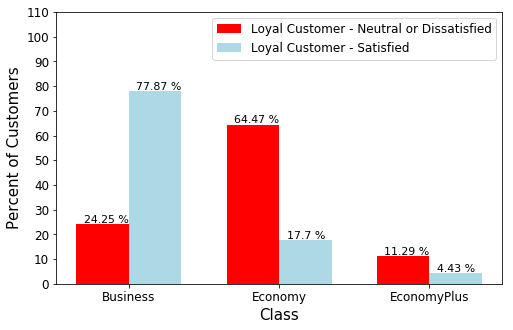

In [31]:
x = np.arange(3)        # the xlabel locations
y = np.arange(0,111,10) # the ylabel locations
y1 = df_class[ (df_class["CustomerType"]=="Loyal Customer") & (df_class["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_class[ (df_class["CustomerType"]=="Loyal Customer") & (df_class["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Business","Economy","EconomyPlus"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title())

In [32]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Class : 0.4691


In [33]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\Class_economy&business.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

-----------

#### 4.2.3b Class (Percentage)
Business class
Economy Class
Economy Class

In [34]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Class"]
df_class = getFeatureInteraction2(df, controlFeature, targetFeature)

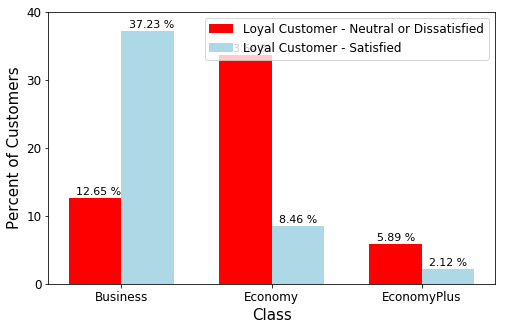

In [35]:
x = np.arange(3)        # the xlabel locations
y = np.arange(0,50,10) # the ylabel locations
y1 = df_class[ (df_class["CustomerType"]=="Loyal Customer") & (df_class["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_class[ (df_class["CustomerType"]=="Loyal Customer") & (df_class["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Business","Economy","EconomyPlus"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L,targetFeature[0].title() )

Comment: Amoung business class loyal customers, 37 % are satisfied (37%) and 13% are dissatisfied/neutral. Thirty-three percent of Loyal customer traveling in economy class are dissatisfied.

--------------

#### 4.2.4a Inflight Wifi Service

In [36]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Inflight wifi service"]
df_wifi = getFeatureInteraction(df, controlFeature, targetFeature)

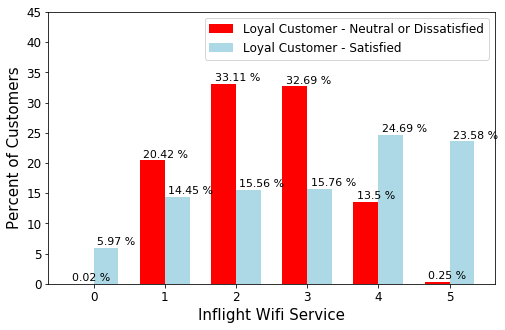

In [37]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_wifi[ (df_wifi["CustomerType"]=="Loyal Customer") & (df_wifi["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_wifi[ (df_wifi["CustomerType"]=="Loyal Customer") & (df_wifi["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [38]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Inflight wifi service : 0.446


In [39]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\wifi.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.4b Percentage plot: Loyal Customers, Wifi

In [40]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Inflight wifi service"]
df_class = getFeatureInteraction2(df, controlFeature, targetFeature)

In [41]:
# df_class

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


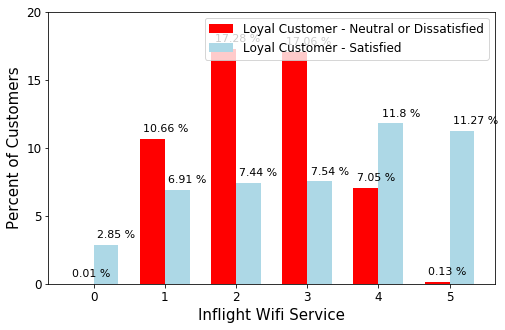

In [42]:
y1 = df_wifi[ (df_wifi["CustomerType"]=="Loyal Customer") & (df_wifi["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_wifi[ (df_wifi["CustomerType"]=="Loyal Customer") & (df_wifi["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(6)      # the xlabel locations
y = np.arange(0,25,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()

h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

Comment: A clear distinction is present between satisfied and dissatisfied customers ranking of inflight wifi service. dissatisfied. Only 30% of all customers ranked wifi service above median. 

-----------

#### 4.2.5a Departure/Arrival Time Convenient

In [43]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Departure/Arrival time convenient"]
df_time_conv = getFeatureInteraction(df, controlFeature, targetFeature)

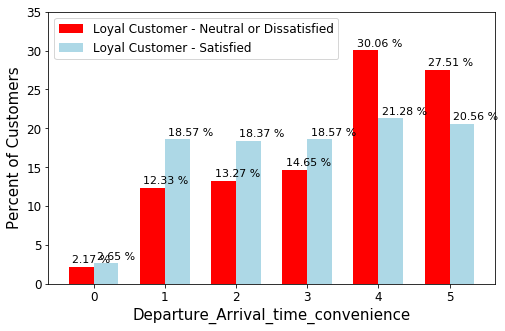

In [44]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_time_conv[ (df_time_conv["CustomerType"]=="Loyal Customer") & (df_time_conv["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_time_conv[ (df_time_conv["CustomerType"]=="Loyal Customer") & (df_time_conv["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, 'Departure_Arrival_time_convenience' )
# plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [45]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Departure/Arrival time convenient : 0.1359


In [46]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\wifi.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.4b Percentage plot: Departure Arrival Time Convenience

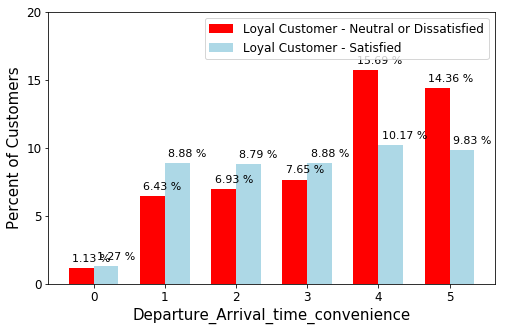

In [47]:
y1 = df_time_conv[ (df_time_conv["CustomerType"]=="Loyal Customer") & (df_time_conv["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_time_conv[ (df_time_conv["CustomerType"]=="Loyal Customer") & (df_time_conv["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(6)      # the xlabel locations
y = np.arange(0,25,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()

h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, 'Departure_Arrival_time_convenience' )
# plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

Comment: Loyal and satisfied customers are mostly indifferent to departure-arrival time convenience.   

-------------

#### 4.2.6a Ease of Online Booking

In [48]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Ease of Online booking"]
df_online_booking = getFeatureInteraction(df, controlFeature, targetFeature)

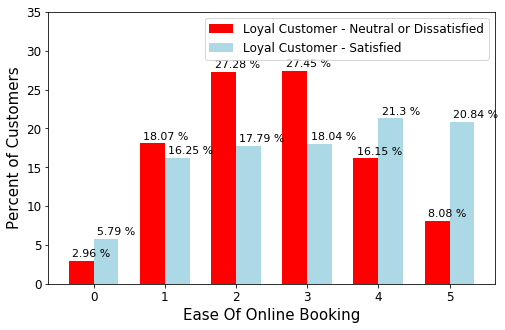

In [49]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_online_booking[ (df_online_booking["CustomerType"]=="Loyal Customer") & (df_online_booking["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_online_booking[ (df_online_booking["CustomerType"]=="Loyal Customer") & (df_online_booking["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [50]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Ease of Online booking : 0.204


In [51]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\wifi.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.6b Percentage plot: Online booking

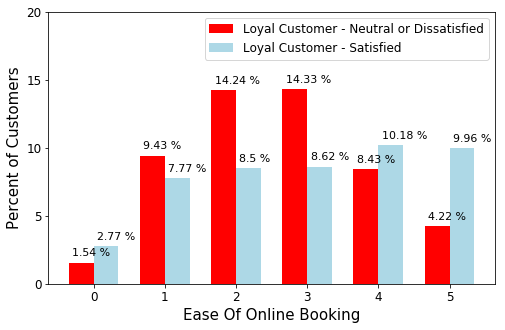

In [52]:
y1 = df_online_booking[ (df_online_booking["CustomerType"]=="Loyal Customer") & (df_online_booking["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_online_booking[ (df_online_booking["CustomerType"]=="Loyal Customer") & (df_online_booking["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(6)      # the xlabel locations
y = np.arange(0,25,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()

h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

Comment: Loyal and satisfied customers are mostly indifferent to online booking but the dissatisfied/neutral customers show  a symmetric behaviour about the median value.   

--------------

#### 4.2.7a Gate Location

In [53]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Gate location"]
df_gateloc = getFeatureInteraction(df, controlFeature, targetFeature)

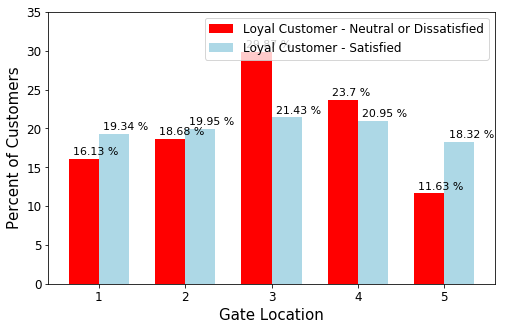

In [54]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_gateloc[ (df_gateloc["CustomerType"]=="Loyal Customer") & (df_gateloc["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_gateloc[ (df_gateloc["CustomerType"]=="Loyal Customer") & (df_gateloc["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()[1:]
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [55]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Gate location : 0.1109


In [56]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.7b Percentage plot: Gate Location

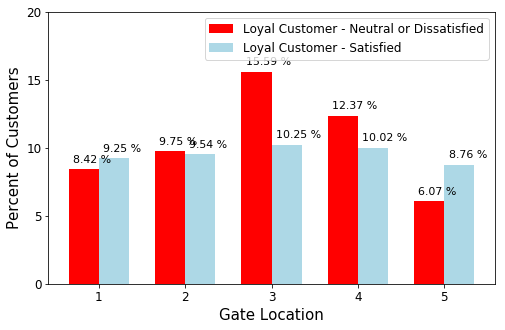

In [57]:
y1 = df_gateloc[ (df_gateloc["CustomerType"]=="Loyal Customer") & (df_gateloc["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_gateloc[ (df_gateloc["CustomerType"]=="Loyal Customer") & (df_gateloc["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(5)      # the xlabel locations
y = np.arange(0,25,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
y2 = y2 [1:6] # Dropping the first element (extra 0 assignment)
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

Comment: Loyal and satisfied customers are mostly indifferent to Gate Location.   

-----

#### 4.2.8a Food and Drink

In [58]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Food and drink"]
df_food = getFeatureInteraction(df, controlFeature, targetFeature) 

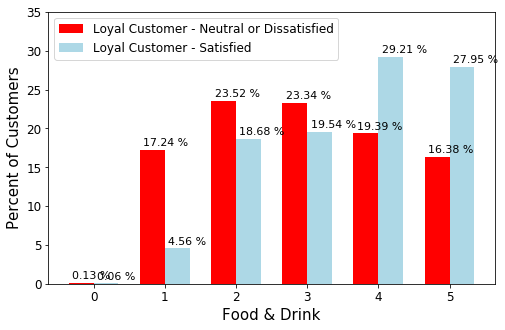

In [59]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_food[ (df_food["CustomerType"]=="Loyal Customer") & (df_food["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_food[ (df_food["CustomerType"]=="Loyal Customer") & (df_food["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label,legend_labels_L, "Food & Drink")

In [60]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Food and drink : 0.2234


In [61]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.7b Percentage plot: Food and Drink

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


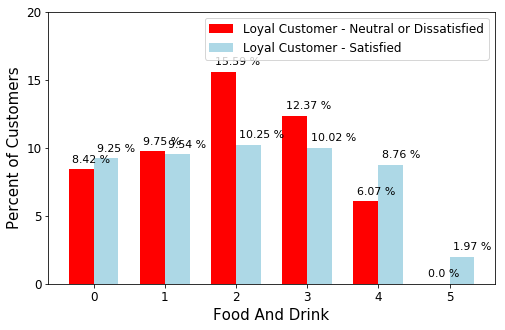

In [62]:
y1 = df_gateloc[ (df_food["CustomerType"]=="Loyal Customer") & (df_food["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_gateloc[ (df_food["CustomerType"]=="Loyal Customer") & (df_food["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(6)      # the xlabel locations
y = np.arange(0,21,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

----------

#### 4.2.9a Online Boarding

In [63]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Online boarding"]
df_online_boarding = getFeatureInteraction(df, controlFeature, targetFeature) 

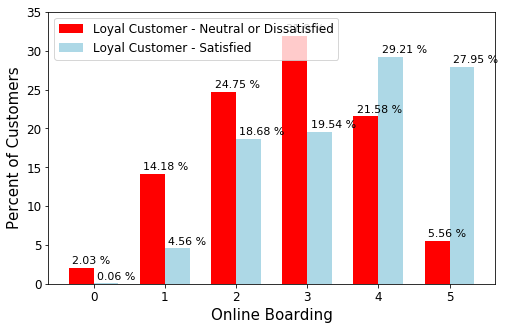

In [64]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_online_boarding[ (df_online_boarding["CustomerType"]=="Loyal Customer") & (df_online_boarding["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_food[ (df_online_boarding["CustomerType"]=="Loyal Customer") & (df_online_boarding["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [65]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Online boarding : 0.527


In [66]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.9b Percentage plot: Online Boarding

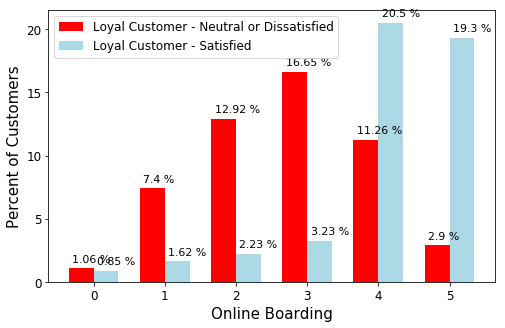

In [67]:
y1 = df_online_boarding[ (df_online_boarding["CustomerType"]=="Loyal Customer") & (df_online_boarding["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_online_boarding[ (df_online_boarding["CustomerType"]=="Loyal Customer") & (df_online_boarding["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(6)      # the xlabel locations
y = np.arange(0,21,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

Comment: Loyal satisfied customers ranked online boarding very favorably compared to the disloyal-dissatisfied customers.

---------

#### 4.2.10a Seat Comfort

In [68]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Seat comfort"]
df_seat_comf = getFeatureInteraction(df, controlFeature, targetFeature) 

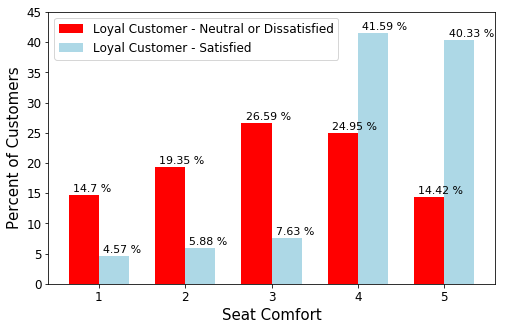

In [69]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_seat_comf[ (df_seat_comf["CustomerType"]=="Loyal Customer") & (df_seat_comf["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_seat_comf[ (df_seat_comf["CustomerType"]=="Loyal Customer") & (df_seat_comf["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()[1:]
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [70]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Seat comfort : 0.3858


In [71]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.10b Percentage plot: Seat Comfort

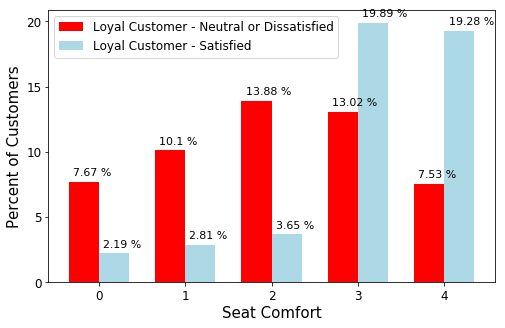

In [72]:
y1 = df_seat_comf[ (df_seat_comf["CustomerType"]=="Loyal Customer") & (df_seat_comf["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_seat_comf[ (df_seat_comf["CustomerType"]=="Loyal Customer") & (df_seat_comf["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(5)      # the xlabel locations
y = np.arange(0,21,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
y1 = y1 [1:6]# y2 has 5 values so dropping the first y1 value 
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y
plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

Comment: Loyal satisfied customers ranked seat-comfort favorably compared to the disloyal-dissatisfied customers.

-----------

#### 4.2.11a Inflight Entertainment

In [73]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Inflight entertainment"]
df_inflight_enter = getFeatureInteraction(df, controlFeature, targetFeature) 

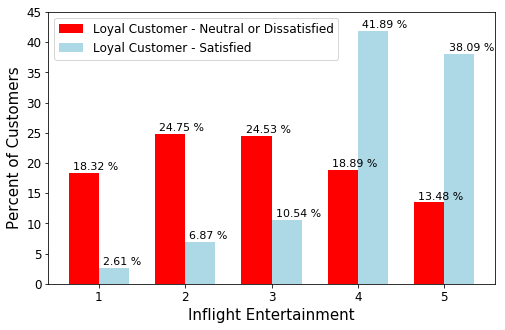

In [74]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_inflight_enter[ (df_inflight_enter["CustomerType"]=="Loyal Customer") & (df_inflight_enter["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_inflight_enter[ (df_inflight_enter["CustomerType"]=="Loyal Customer") & (df_inflight_enter["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()[1:]
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [75]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Inflight entertainment : 0.4286


In [76]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.11b Percentage plot: Inflight Entertainment

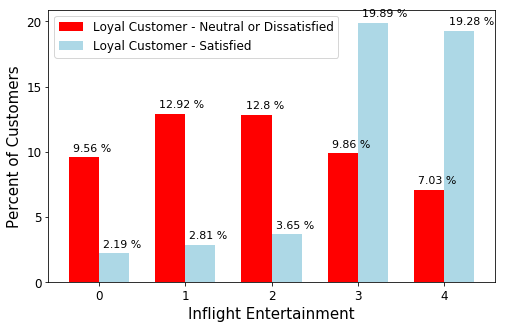

In [77]:
y1 = df_inflight_enter[ (df_inflight_enter["CustomerType"]=="Loyal Customer") & (df_inflight_enter["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_seat_comf[ (df_inflight_enter["CustomerType"]=="Loyal Customer") & (df_inflight_enter["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(5)      # the xlabel locations
y = np.arange(0,21,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
y1 = y1 [1:6]# y2 has 5 values so dropping the first y1 value 

h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y
plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

---------

#### 4.2.13a Leg Room Service

In [78]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Leg room service"]
df_leg_room = getFeatureInteraction(df, controlFeature, targetFeature) 

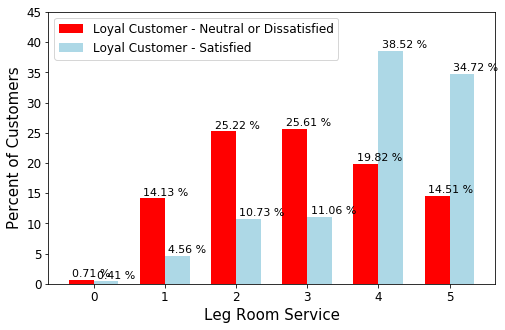

In [79]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_leg_room[ (df_leg_room["CustomerType"]=="Loyal Customer") & (df_leg_room["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_leg_room[ (df_leg_room["CustomerType"]=="Loyal Customer") & (df_leg_room["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [80]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Leg room service : 0.3387


In [81]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.13b Percentage plot: Leg Room Service

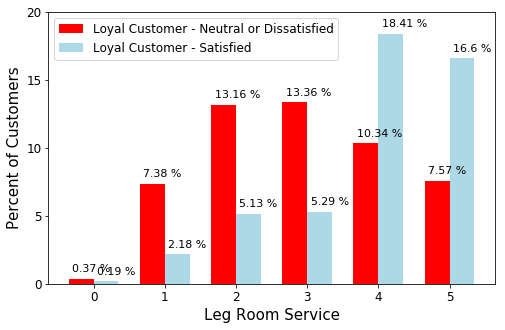

In [82]:
y1 = df_leg_room[ (df_leg_room["CustomerType"]=="Loyal Customer") & (df_leg_room["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_leg_room[ (df_leg_room["CustomerType"]=="Loyal Customer") & (df_leg_room["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(6)      # the xlabel locations
y = np.arange(0,21,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y
plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

----------

#### 4.2.14a Baggage Handling

In [83]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Baggage handling"]
df_baggage = getFeatureInteraction(df, controlFeature, targetFeature) 

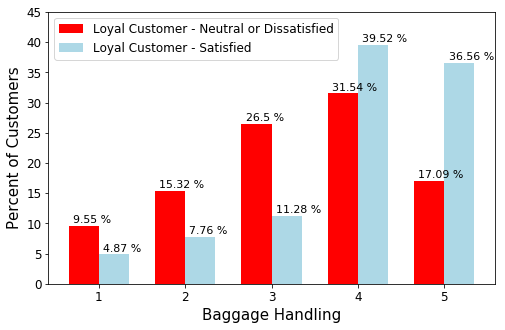

In [84]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_baggage[ (df_baggage["CustomerType"]=="Loyal Customer") & (df_baggage["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_baggage[ (df_baggage["CustomerType"]=="Loyal Customer") & (df_baggage["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [85]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Baggage handling : 0.2583


##### 4.2.14b Percentage plot: Baggage Handling

In [86]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

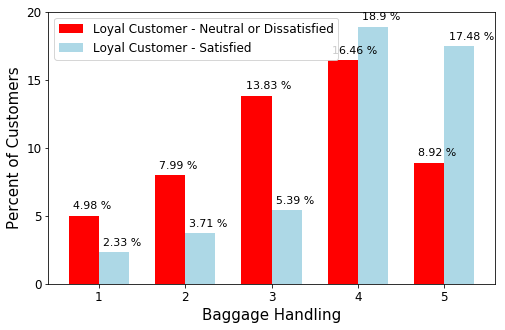

In [87]:
y1 = df_baggage[ (df_baggage["CustomerType"]=="Loyal Customer") & (df_baggage["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_baggage[ (df_baggage["CustomerType"]=="Loyal Customer") & (df_baggage["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(5)      # the xlabel locations
y = np.arange(0,21,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y
plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

-------------

#### 4.2.15a Checkin Service

In [88]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Checkin service"]
df_checkin = getFeatureInteraction(df, controlFeature, targetFeature) 

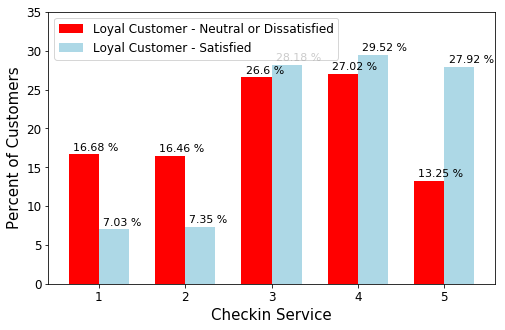

In [89]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_checkin[ (df_checkin["CustomerType"]=="Loyal Customer") & (df_checkin["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_checkin[ (df_checkin["CustomerType"]=="Loyal Customer") & (df_checkin["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()[1:]
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [90]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Checkin service : 0.2176


In [91]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

##### 4.2.15b Percentage plot: Checkin Service

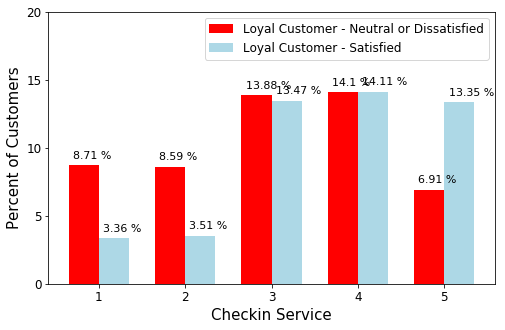

In [92]:
y1 = df_checkin[ (df_checkin["CustomerType"]=="Loyal Customer") & (df_checkin["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_checkin[ (df_checkin["CustomerType"]=="Loyal Customer") & (df_checkin["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(5)      # the xlabel locations
y = np.arange(0,21,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
y1 = y1 [1:6]# y2 has 5 values so dropping the first y1 value 
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y
plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

-------------

#### 4.2.16a Inflight Service

In [93]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Inflight service"]
df_inflight_service = getFeatureInteraction(df, controlFeature, targetFeature) 

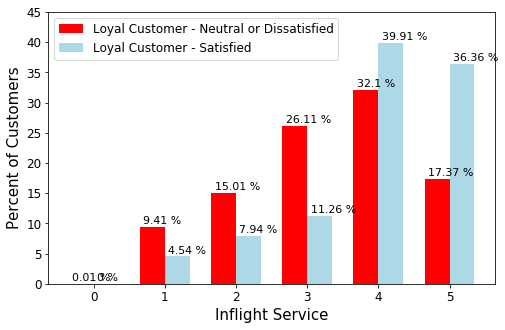

In [94]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_inflight_service[ (df_inflight_service["CustomerType"]=="Loyal Customer") & (df_inflight_service["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_inflight_service[ (df_inflight_service["CustomerType"]=="Loyal Customer") & (df_inflight_service["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = [0] + y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

In [95]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Inflight service : 0.253


In [96]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.16b Percentage Plot: Inflight Service

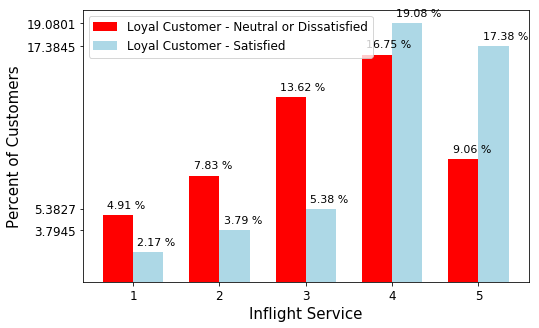

In [97]:
y1 = df_inflight_service[(df_inflight_service["CustomerType"]=="Loyal Customer") & (df_inflight_service["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_inflight_service[ (df_inflight_service["CustomerType"]=="Loyal Customer") & (df_inflight_service["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(5)      # the xlabel locations
y = np.arange(0,21,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
y1 = y1 [1:6]# First (0th) value is negligible possibly assigned incorrectly 
y = y2 [1:6]# First (0th) value is negligible possibly assigned incorrectly 

h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y
plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

-------------

#### 4.2.17a Cleanliness

In [98]:
controlFeature = ["CustomerType","SatisfactionType"]
targetFeature  = ["Cleanliness"]
df_clean = getFeatureInteraction(df, controlFeature, targetFeature) 

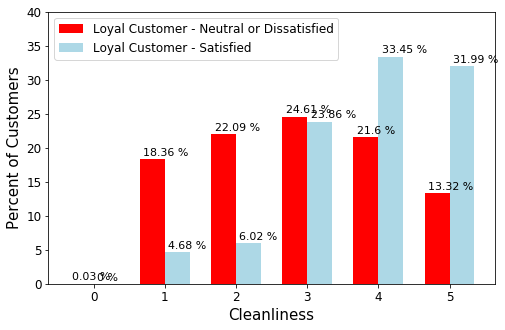

In [99]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,41,5) # the ylabel locations

y1 = df_clean[(df_clean["CustomerType"]=="Loyal Customer") & (df_clean["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_clean[(df_clean["CustomerType"]=="Loyal Customer") & (df_clean["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = [0] + y2['Fraction'].to_list()
h = [y1,y2]

xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title())

In [100]:
js_distance = getJensenShannon(df, controlFeature, targetFeature)
print(f"Distribution Similarity : CustomerType & Satisfaction Type vs {targetFeature[0]} : {round(js_distance,4)}")

Distribution Similarity : CustomerType & Satisfaction Type vs Cleanliness : 0.3234


In [101]:
fig.savefig(r'C:\Users\AR\TDI Project\Models\Figures\gate_location.png', dpi=fig.dpi)
cat_feature.append(targetFeature[0])
cat_value.append(js_distance)

#### 4.2.17b Percentage Plot: Cleanliness

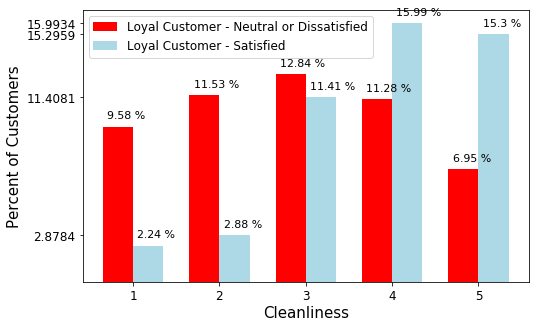

In [102]:
y1 = df_clean[(df_clean["CustomerType"]=="Loyal Customer") & (df_clean["SatisfactionType"]=="neutral or dissatisfied") ] 
y1['Fraction']=y1.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
y2 = df_clean[ (df_clean["CustomerType"]=="Loyal Customer") & (df_clean["SatisfactionType"]=="satisfied") ] 
y2['Fraction']=y2.apply( lambda x : round(100 * float(x[3])/num_loyal, 4), axis=1)
x = np.arange(5)      # the xlabel locations
y = np.arange(0,25,5) # the ylabel locations
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
y1 = y1 [1:6]# First (0th) value is negligible possibly assigned incorrectly 
y = y2 [1:6]# First (0th) value is negligible possibly assigned incorrectly 

h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y
plotFeatureInteraction(x, y, h, xtick_label, ytick_label, legend_labels_L, targetFeature[0].title() )

------------

#### 4.2.18 Delay in Arrival

In [103]:
df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Arrival Delay in Minutes': ['mean', 'std']} ).reset_index()

CustomerType         SatisfactionType Arrival Delay in Minutes  \
                                                                  mean   
0     Loyal Customer  neutral or dissatisfied                17.281436   
1     Loyal Customer                satisfied                12.520327   
2  disloyal Customer  neutral or dissatisfied                16.365639   
3  disloyal Customer                satisfied                12.654184   

              
         std  
0  41.068331  
1  35.438232  
2  38.794267  
3  35.552438

In [104]:
df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Arrival Delay in Minutes': ['median']} ).reset_index()

,CustomerType,SatisfactionType,Arrival Delay in Minutes
,,,median
0,Loyal Customer,neutral or dissatisfied,0.0
1,Loyal Customer,satisfied,0.0
2,disloyal Customer,neutral or dissatisfied,0.0
3,disloyal Customer,satisfied,0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


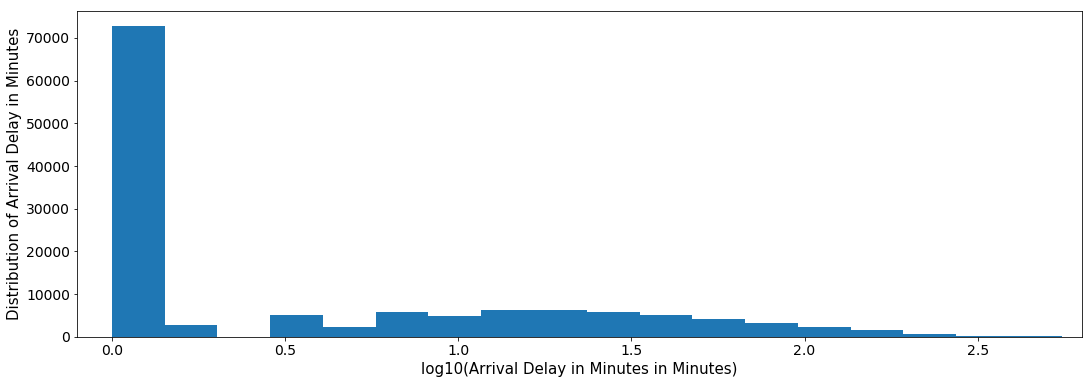

In [105]:
fig = plt.figure( figsize=(18,6))

N, bins, patches = plt.hist( np.log10(1+df['Arrival Delay in Minutes']), bins=21)
    
plt.xticks(fontsize=14)
plt.xlim(xmin=-0.1, xmax=2.8)
plt.xlabel("log10(Arrival Delay in Minutes in Minutes)", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Distribution of Arrival Delay in Minutes", fontsize=15)

plt.show()

--------

#### 4.2.19 Delay in Departure

In [106]:
df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Departure Delay in Minutes': ['mean','std']} ).reset_index()

CustomerType         SatisfactionType Departure Delay in Minutes  \
                                                                    mean   
0     Loyal Customer  neutral or dissatisfied                  16.621722   
1     Loyal Customer                satisfied                  12.485550   
2  disloyal Customer  neutral or dissatisfied                  15.748728   
3  disloyal Customer                satisfied                  12.725439   

              
         std  
0  40.836516  
1  34.973240  
2  38.105071  
3  35.342540

In [107]:
df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Departure Delay in Minutes': ['median']} ).reset_index()

,CustomerType,SatisfactionType,Departure Delay in Minutes
,,,median
0,Loyal Customer,neutral or dissatisfied,0.0
1,Loyal Customer,satisfied,0.0
2,disloyal Customer,neutral or dissatisfied,0.0
3,disloyal Customer,satisfied,0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


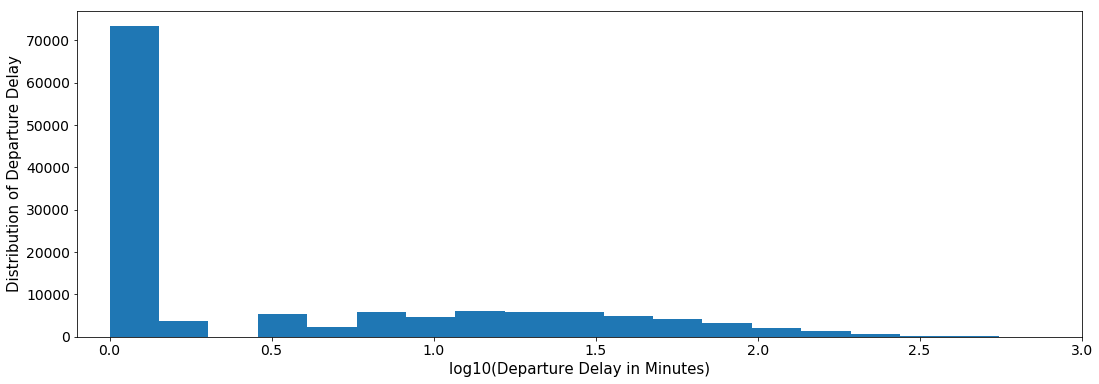

In [108]:
fig = plt.figure( figsize=(18,6))

N, bins, patches = plt.hist( np.log10(1+df['Departure Delay in Minutes']), bins=21)

plt.xticks(fontsize=14)
plt.xlim(xmin=-0.1, xmax=3)
plt.xlabel("log10(Departure Delay in Minutes)", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Distribution of Departure Delay", fontsize=15)

plt.show()

#### Relationship between Arrival Delay in Minutes & Departure Delay in Minutes

Strongly Correlated  

In [109]:
df_arr_dep = df[['Arrival Delay in Minutes','Departure Delay in Minutes']]
df_arr_dep.corr()

,Arrival Delay in Minutes,Departure Delay in Minutes
Arrival Delay in Minutes,1.000000,0.965291
Departure Delay in Minutes,0.965291,1.000000


----------

#### 4.2.20 Flight Distance

In [110]:
"""Replace unknown distance by the median value"""
distList = sorted( df["Flight Distance"].unique() )
distList = distList[:-4:-1]
tmpdf = df[ df["Flight Distance"] <= distList[1] ]
#print( tmpdf["Flight Distance"].median() )
#print( tmpdf["Flight Distance"].mean() )
tmpdf.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Flight Distance': ['mean','std']} ).reset_index()

CustomerType         SatisfactionType Flight Distance             
                                                         mean          std
0     Loyal Customer  neutral or dissatisfied     1001.231128   851.766078
1     Loyal Customer                satisfied     1619.942773  1143.951308
2  disloyal Customer  neutral or dissatisfied      710.693623   508.356699
3  disloyal Customer                satisfied      724.978772   469.941239

In [111]:
# controlFeature = ["CustomerType","SatisfactionType"]
# targetFeature  = ["Flight Distance"]
# df_travel_type = getFeatureInteraction(df, controlFeature, targetFeature)

In [112]:
df_flight_dist = df.groupby(controlFeature).agg({ 'Flight Distance': ['median']} ).reset_index()
print(df_flight_dist)

        CustomerType         SatisfactionType Flight Distance
                                                       median
0     Loyal Customer  neutral or dissatisfied           700.0
1     Loyal Customer                satisfied          1521.0
2  disloyal Customer  neutral or dissatisfied           591.0
3  disloyal Customer                satisfied           622.0


#### 4.2.21 Age

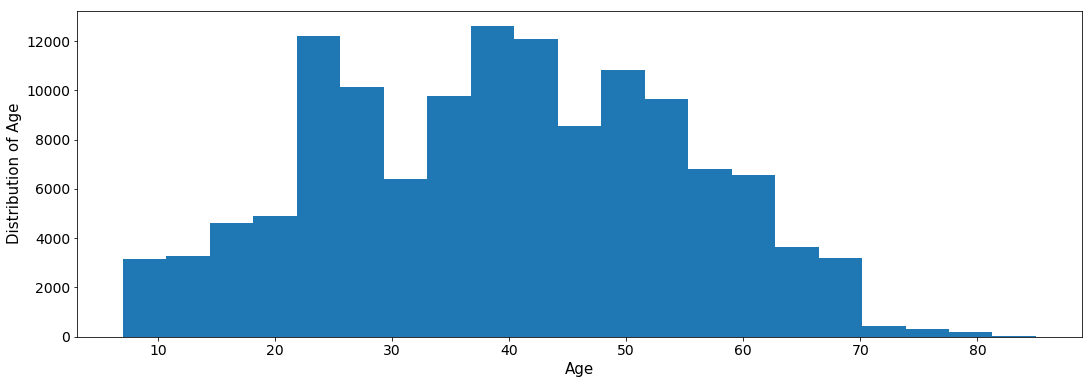

In [113]:
fig = plt.figure( figsize=(18,6))

N, bins, patches = plt.hist(df['Age'], bins=21)

    
plt.xticks(fontsize=14)
plt.xlabel("Age", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Distribution of Age", fontsize=15)

plt.show()

#### Distribution of age

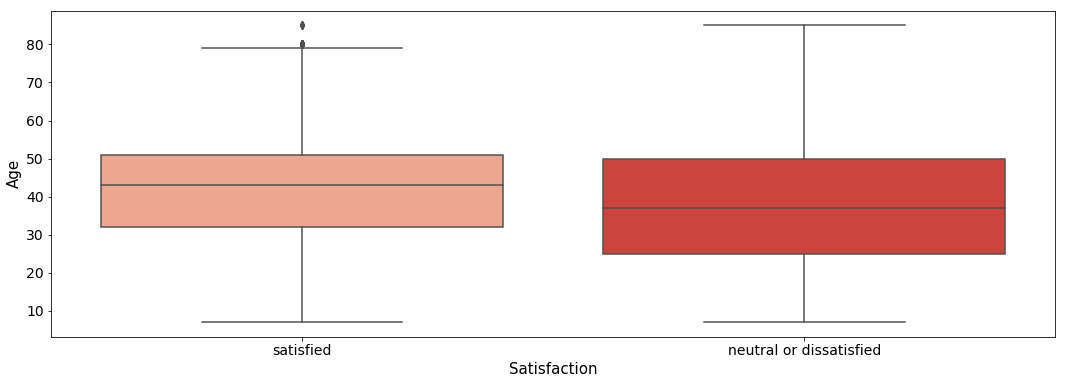

In [114]:
fig = plt.figure( figsize=(18,6))

sns.boxplot( y=df["Age"], x=df["SatisfactionType"], palette="Reds")
plt.xticks(fontsize=14)
plt.xlabel("Satisfaction", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Age", fontsize=15)

plt.show()

----------------

## Part 5: Shannon-Jensen Distance plot

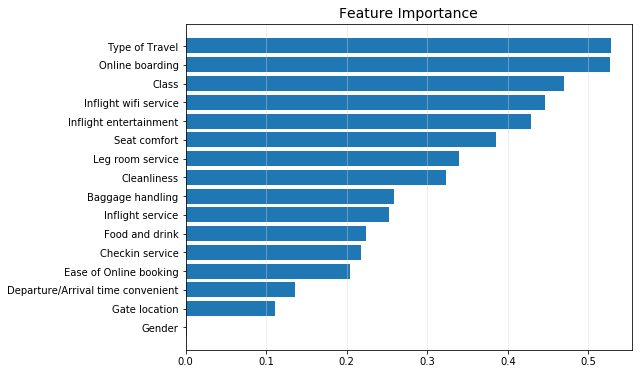

In [115]:
sj_dict = {'Feature':cat_feature,'Distance':cat_value}
sj_df = pd.DataFrame(sj_dict).sort_values(['Distance'])
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(sj_df)), sj_df['Distance'])
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(sj_df)), sj_df.Feature)
plt.title('Feature Importance', fontsize=14)
plt.show()

## Part 6: Explore Class Decision Boundary 

It is eeasier to explore Class Boundary using numerical features.

This 2D plot helps to visualize the complexity of the decision boundary. It also provides qualitative assesment 
of the strengths of the features in sepearting the classes.

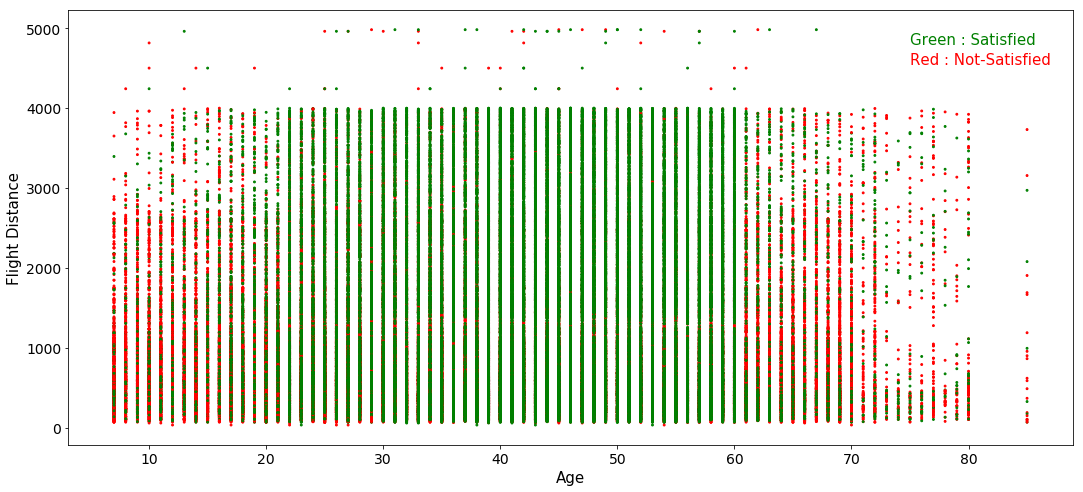

In [116]:
"""
    Case 1: Age vs Flight Distance 
    Flight Distance has some bad data (about 14 out of 129,800). Remove those for this exercise
"""
plt.figure( figsize=(18,8))
distList = sorted( df["Flight Distance"].unique() )
distList = distList[:-4:-1]
tmpdf = df[ df["Flight Distance"] <= distList[1] ]
#print( tmpdf["Flight Distance"].median() )
#print( tmpdf["Flight Distance"].mean() )
#tmpdf.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Flight Distance': ['mean','std']} ).reset_index()

color= ['green' if l == "satisfied" else 'red' for l in tmpdf['SatisfactionType']]
plt.scatter(tmpdf['Age'], tmpdf['Flight Distance'], s=[3.5,], color=color)

plt.xticks(fontsize=14)
plt.xlabel("Age", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Flight Distance", fontsize=15)

plt.text(75, 4800, 'Green : Satisfied', color='g', fontsize=15)
plt.text(75, 4550, 'Red : Not-Satisfied', color='r', fontsize=15)

plt.show()

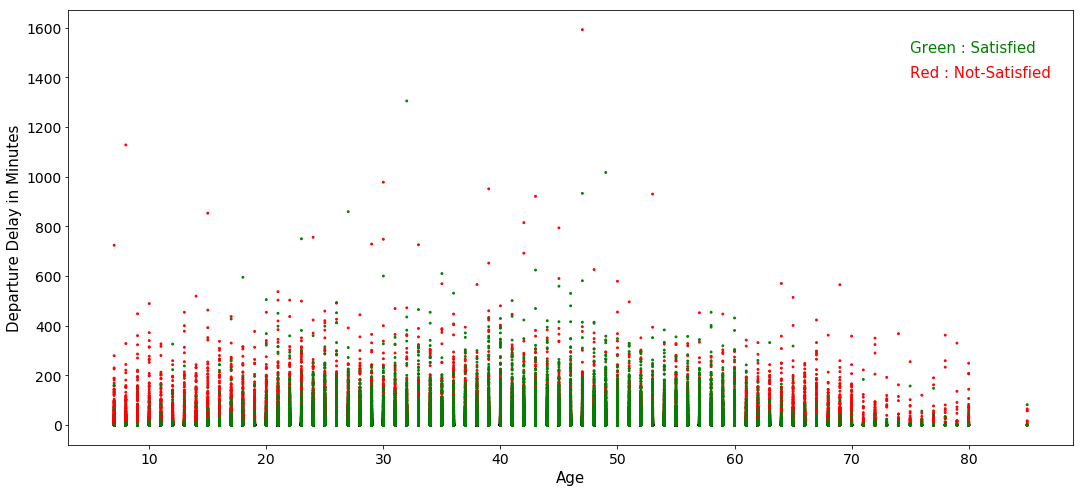

In [117]:
"""
    Case 2: Age vs Departure Delay in Minutes 
"""
plt.figure( figsize=(18,8))

color= ['green' if l == "satisfied" else 'red' for l in df['SatisfactionType']]
plt.scatter(df['Age'], df['Departure Delay in Minutes'], s=[3.5,], color=color)

plt.xticks(fontsize=14)
plt.xlabel("Age", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Departure Delay in Minutes", fontsize=15)

plt.text(75, 1500, 'Green : Satisfied', color='g', fontsize=15)
plt.text(75, 1400, 'Red : Not-Satisfied', color='r', fontsize=15)

plt.show()

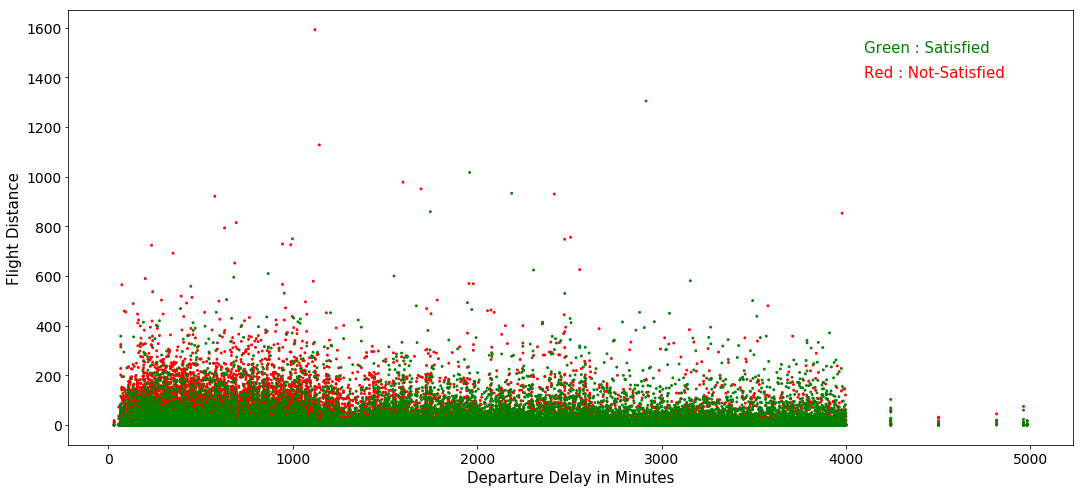

In [118]:
"""
    Case 3: Flight Distance vs Departure Delay in Minutes
    Flight Distance has some bad data (about 14 out of 129,800). Remove those for this exercise
"""
plt.figure( figsize=(18,8))
distList = sorted( df["Flight Distance"].unique() )
distList = distList[:-4:-1]
tmpdf = df[ df["Flight Distance"] <= distList[1] ]

color= ['green' if l == "satisfied" else 'red' for l in tmpdf['SatisfactionType']]
plt.scatter( tmpdf['Flight Distance'], tmpdf['Departure Delay in Minutes'], s=[3.5,], color=color)

plt.xticks(fontsize=14)
plt.xlabel("Departure Delay in Minutes", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Flight Distance", fontsize=15)

plt.text(4100, 1500, 'Green : Satisfied', color='g', fontsize=15)
plt.text(4100, 1400, 'Red : Not-Satisfied', color='r', fontsize=15)

plt.show()

-------

## Part 7: Conclusion

The company has eighty-two percent (82%) loyal customers, and the remaining customers are not loyal. Among the customers, the overall satisfaction and dissatisfaction/neutral are nearly equal. It is important for the company to identify the factors that affect customer satisfaction most and improve those.  The Shannon-Jensen distance provides the similarity measure between these two groups. The smaller the distance, the less the effect on this variable on satisfaction and/or dissatisfaction.
- Gender does not have any major effect on loyalty and customer satisfaction.
- Loyal customers while traveling business class are satisfied, but while on economy class are dissatisfied/neutral. 
- Wifi service is a concern and contributes to loyal customer dissatisfaction.
- Online boarding, seat comfort, inflight entertainment, leg-room service, and baggage handling show similar patterns. A  fraction of the satisfied customers ranked these features very favorably. A closer look at these features, along with gender and age may reveal more information. 


# Future Work

# Dependence of Type of Travel and Class

In [119]:
controlFeature = ["CustomerType","SatisfactionType","Type of Travel"]
targetFeature  = ['Class']
df1 = df.groupby(controlFeature + targetFeature).size().to_frame().reset_index().rename( columns= {0:"Count"} )
df2 = df.groupby(controlFeature).size().to_frame().reset_index().rename( columns= {0:"Count"} )
grouped = pd.merge(df1, df2, left_on=controlFeature, right_on=controlFeature)
grouped['Fraction'] = grouped.apply( lambda x : round(100 * float(x[4])/106100, 4), axis=1)

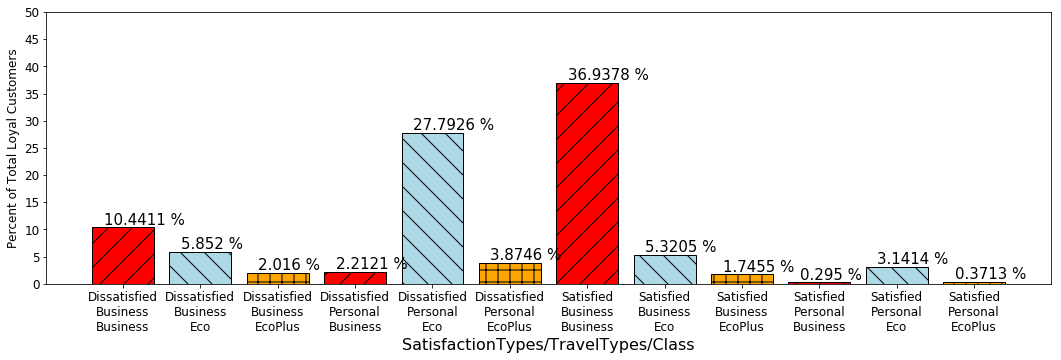

In [120]:
fig, ax = plt.subplots(figsize=(18,5))

x = np.arange(12)
y = np.arange(0,51,5)
patterns = [ "/" , "\\" ,"+", "/" , "\\" ,"+","/" , "\\" ,"+", "/" , "\\" ,"+"]
colors=["red", "lightblue", "orange"]*4#,'lightblue','red', 'lightblue', 'red','lightblue',
       #'red', 'lightblue', 'red','lightblue','red', 'lightblue', 'red','lightblue']

xlabel = ["Dissatisfied\nBusiness\nBusiness", "Dissatisfied\nBusiness\nEco", "Dissatisfied\nBusiness\nEcoPlus",
          "Dissatisfied\nPersonal\nBusiness", "Dissatisfied\nPersonal\nEco", "Dissatisfied\nPersonal\nEcoPlus",
          "Satisfied\nBusiness\nBusiness", "Satisfied\nBusiness\nEco", "Satisfied\nBusiness\nEcoPlus",
          "Satisfied\nPersonal\nBusiness", "Satisfied\nPersonal\nEco", "Satisfied\nPersonal\nEcoPlus"]
bars = ax.bar(x, grouped['Fraction'][0:12])#, color=['red', 'lightblue', 'red','lightblue'],hatch= "/"  )

for i in range(len(patterns)):
    ax.bar(x[i], grouped['Fraction'][i], color=colors[i], edgecolor='black', hatch=patterns[i])
    
# bars = ax.bar(x, grouped['Fraction'][0:12])#, color=['red', 'lightblue', 'red','lightblue'],hatch= "/"  )

# Setting x-axis
ax.set_xticks(x)
ax.set_xticklabels(labels=xlabel, fontsize=12)
ax.set_xlabel("SatisfactionTypes/TravelTypes/Class", fontsize=16)

# Setting y-axis
ax.set_yticks(y)
ax.set_yticklabels(labels=y, fontsize=12)
ax.set_ylabel("Percent of Total Loyal Customers", fontsize=12)

# Setting bar text 
for k in x:
    height = bars[k].get_height()
    plt.text(x[k]-0.25, height+0.5, str(grouped['Fraction'].tolist()[k])+" %", fontsize=15)

plt.show()

In [121]:
fig.savefig('Satisfaction_TravelType_Class.png', dpi=fig.dpi)

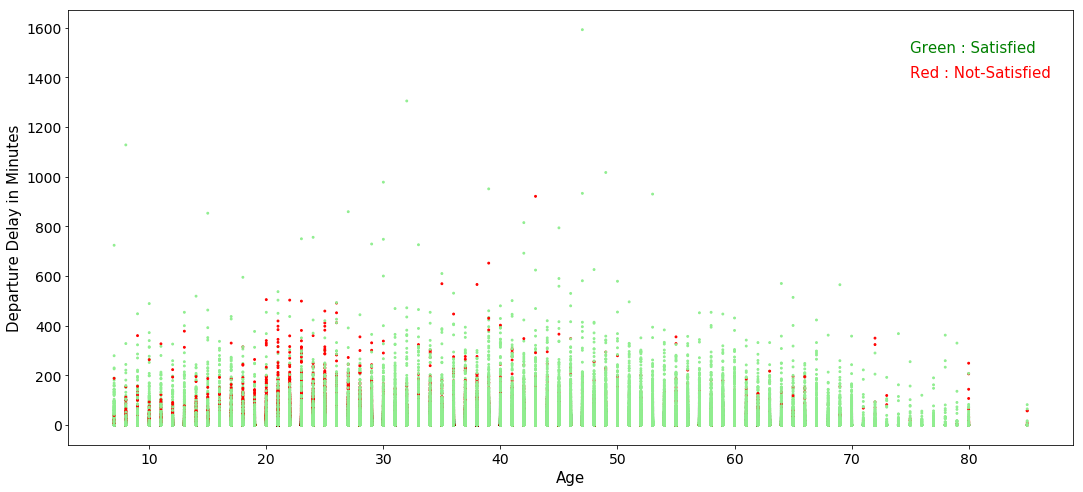

In [122]:
"""
    Case 2: Age vs Departure Delay in Minutes 
"""
plt.figure( figsize=(18,8))

color= ['lightgreen' if l == "Loyal Customer" else 'red' for l in df['CustomerType']]
plt.scatter(df['Age'], df['Departure Delay in Minutes'], s=[3.5,], color=color)

plt.xticks(fontsize=14)
plt.xlabel("Age", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Departure Delay in Minutes", fontsize=15)

plt.text(75, 1500, 'Green : Satisfied', color='g', fontsize=15)
plt.text(75, 1400, 'Red : Not-Satisfied', color='r', fontsize=15)

plt.show()